In [1]:
%reload_ext autoreload
%autoreload 2

In this part we will analyse the time bias in the ratings, how the time influence the final ratings of beer. We see the evolution through the years but also the difference at some special period, specifically the Christmas and new year period and the Oktober fest period.

## Influence of time on the ratings

In [2]:
from src.utils.data_utils import load_time_bias_data

# Load the data and do some preprocessing, cleaning and add time columns
time_df_rateBeer, time_df_beerAdvocate = load_time_bias_data('data')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oolli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oolli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


First we look at different style of beer and how they evolve through the years.

In [3]:
# Analysis using time and rating per beer style
time_df_rateBeer_style = time_df_rateBeer.copy()
# Take randomly (following a seed) 10 type of style
time_df_rateBeer_style = time_df_rateBeer_style[time_df_rateBeer_style['style'].isin(time_df_rateBeer_style['style'].sample(10, random_state=1))]
time_df_rateBeer_style = time_df_rateBeer_style.groupby(['style', 'year', 'month'])['rating'].agg(['mean', 'count'])

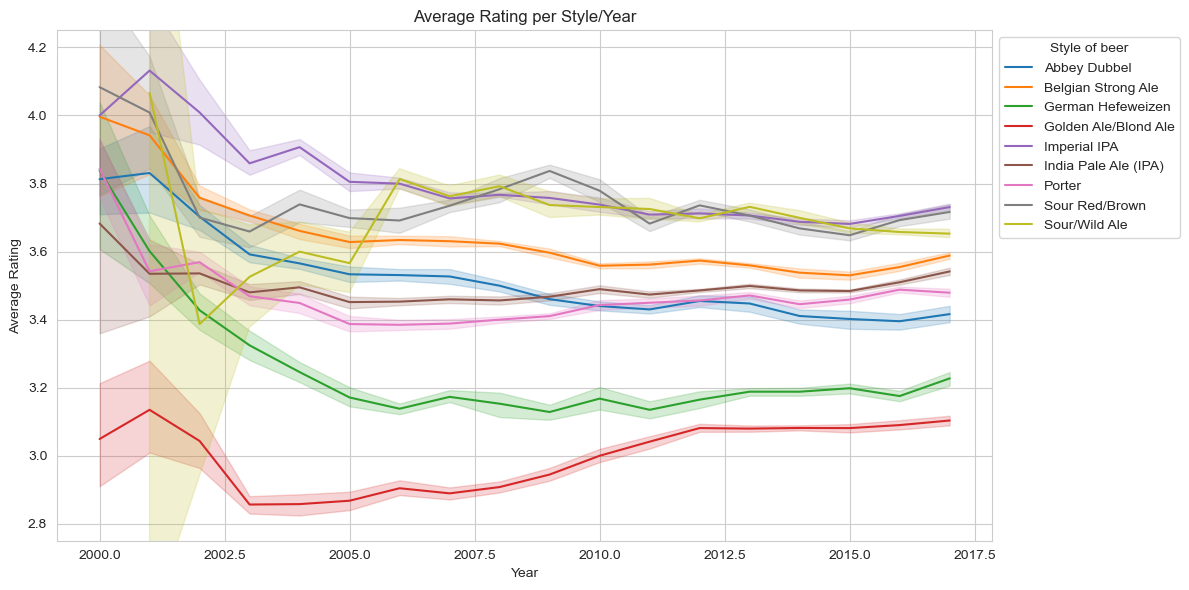

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot the average rating per style and year
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_df_rateBeer_style, x='year', y='mean', hue='style')

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating per Style/Year')
plt.legend(title='Style of beer', bbox_to_anchor=(1, 1), loc='upper left')
plt.ylim(2.75, 4.25)
plt.tight_layout()

They all start with a high variance in the ratings, but as the years go by, the ratings tend to converge to a certain value. The high rated seams to go down, and the low rated seams to go up. globally they are quite stable. Let's test some more style to confirm.

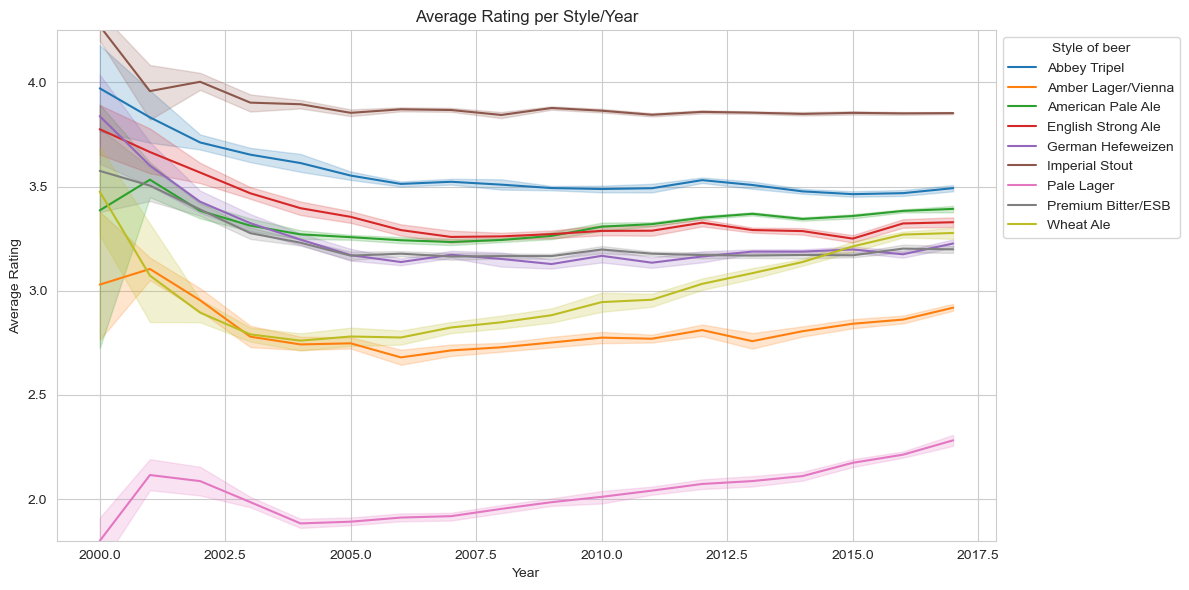

In [5]:
# Take randomly (following a seed) 10 type of style
time_df_rateBeer_style = time_df_rateBeer.copy()
time_df_rateBeer_style = time_df_rateBeer_style[time_df_rateBeer_style['style'].isin(time_df_rateBeer_style['style'].sample(10, random_state=2))]
time_df_rateBeer_style = time_df_rateBeer_style.groupby(['style', 'year', 'month'])['rating'].agg(['mean', 'count'])

# plot the average rating per style and year
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_df_rateBeer_style, x='year', y='mean', hue='style')

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating per Style/Year')
plt.legend(title='Style of beer', bbox_to_anchor=(1, 1), loc='upper left')
plt.ylim(1.8, 4.25)
plt.tight_layout()

In [6]:
# compute the mean rating for the years 2016 and 2017
rateBeer_end = time_df_rateBeer[time_df_rateBeer['year'].isin([2016, 2017])]
# Calculate the global mean rating for those years
global_mean_end = rateBeer_end['rating'].mean()
print(f"Global mean rating for the last years: {global_mean_end}")

Global mean rating for the last years: 3.412139683797763


We see that the second sample of style follow the same rule as the first one. The ratings tend to converge to a certain value. The high rated seams to go down, and the low rated seams to go up. We will try to explain this with more researches. We note that the global rating for all beer for the last two years is 3.41.

Here we will see what and how much the year the month and the day affect the rating.

In [7]:
import statsmodels.formula.api as smf

time_df_rateBeer_cat = time_df_rateBeer.copy()
# Compute the mean of all rating to see which column affect the rating around the mean
mean = time_df_rateBeer_cat['rating'].mean()
time_df_rateBeer_cat['binary_rating'] = (time_df_rateBeer_cat['rating'] >= mean).astype(int)

# Check which columns will impact the most the rating using a linear regression analysis
log = smf.logit(formula='binary_rating ~ year + month + day', data=time_df_rateBeer_cat)
log = log.fit()
print(log.summary())

Optimization terminated successfully.
         Current function value: 0.668482
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          binary_rating   No. Observations:              6117679
Model:                          Logit   Df Residuals:                  6117675
Method:                           MLE   Df Model:                            3
Date:                Fri, 20 Dec 2024   Pseudo R-squ.:                0.008102
Time:                        17:25:18   Log-Likelihood:            -4.0896e+06
converged:                       True   LL-Null:                   -4.1230e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -110.0059      0.431   -255.329      0.000    -110.850    -109.162
year           0.0549      0.

We can see that the year has a significant impact on the rating, the month and the day have a less significant impact.

Now we will compare the average rating per year for all beer and see there evolution as we know the year affect much. We add an error bar using the standard deviation. We test this for both dataset to see the difference. We also look at how many rating have been given for each year.

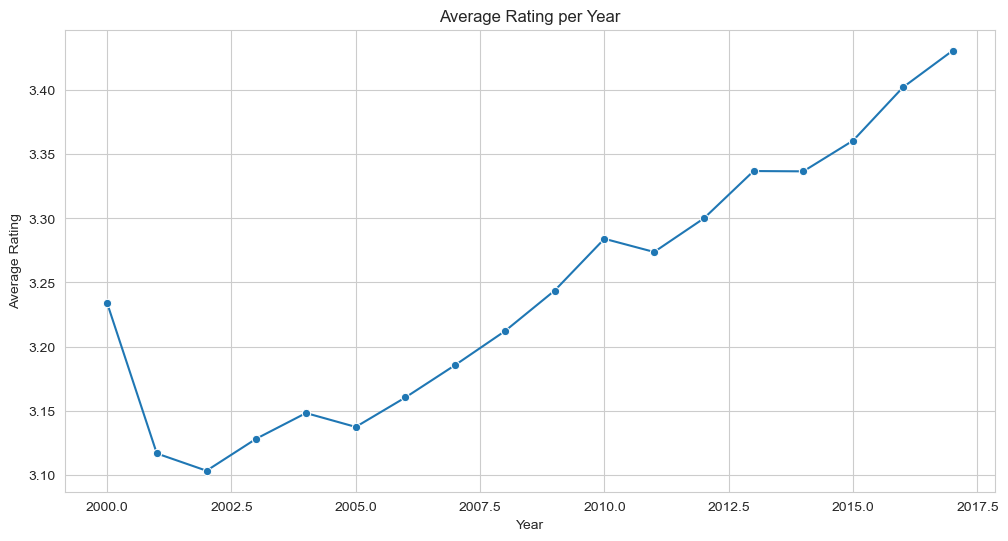

In [8]:
# Compare the average rating per year for all beer for the RateBeer dataset
mean = time_df_rateBeer.groupby('year')['rating'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean, x='year', y='rating', marker='o')

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating per Year')
plt.show()

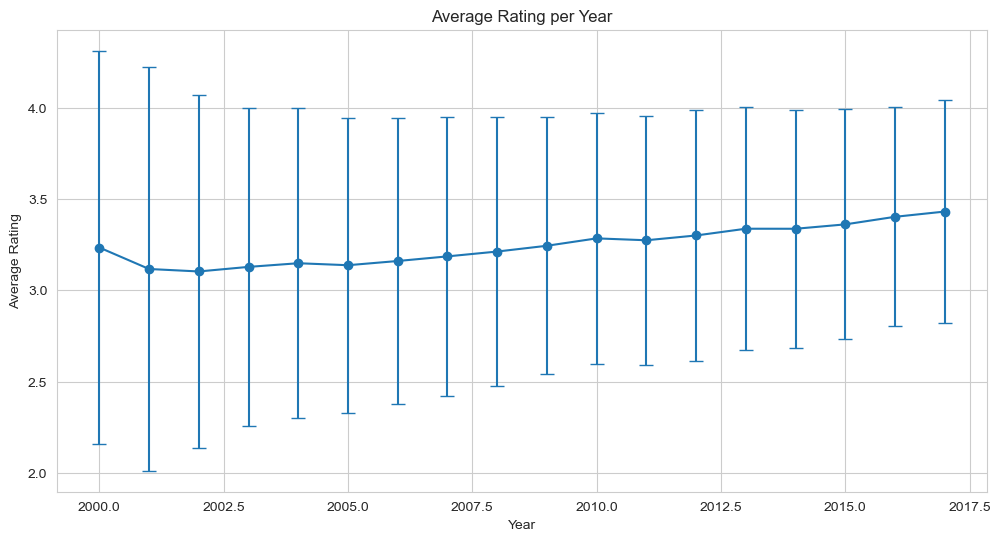

In [9]:
# Compare the average rating per year for all beer with std for the RateBeer dataset
mean = time_df_rateBeer.groupby('year')['rating'].mean().reset_index()
# Add the standard deviation to the plot
std = time_df_rateBeer.groupby('year')['rating'].std().reset_index()
plt.figure(figsize=(12, 6))
plt.errorbar(mean['year'], mean['rating'], yerr=std['rating'], capsize=5, marker='o')

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating per Year')
plt.show()

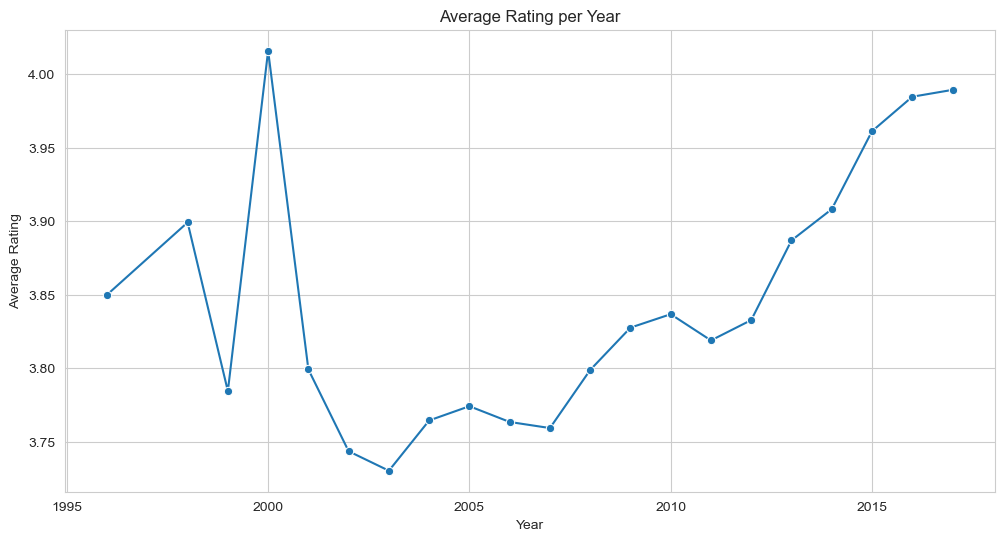

In [10]:
# Compare the average rating per year for all beer for the BeerAdvocate dataset
mean = time_df_beerAdvocate.groupby('year')['rating'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean, x='year', y='rating', marker='o')

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating per Year')
plt.show()

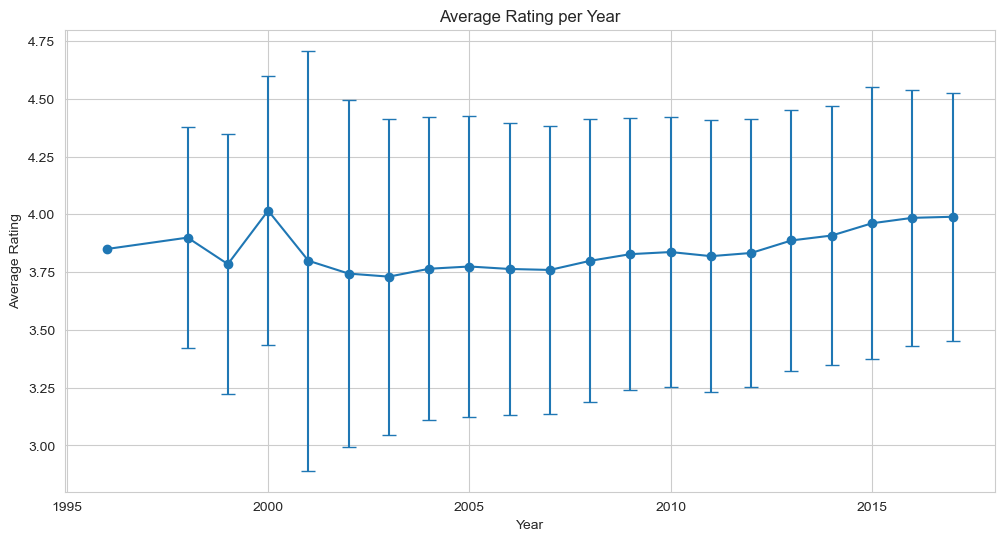

In [11]:
# Compare the average rating per year for all beer with std for the BeerAdvocate dataset
mean = time_df_beerAdvocate.groupby('year')['rating'].mean().reset_index()
# Add the standard deviation to the plot
std = time_df_beerAdvocate.groupby('year')['rating'].std().reset_index()
plt.figure(figsize=(12, 6))
plt.errorbar(mean['year'], mean['rating'], yerr=std['rating'], capsize=5, marker='o')

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating per Year')
plt.show()

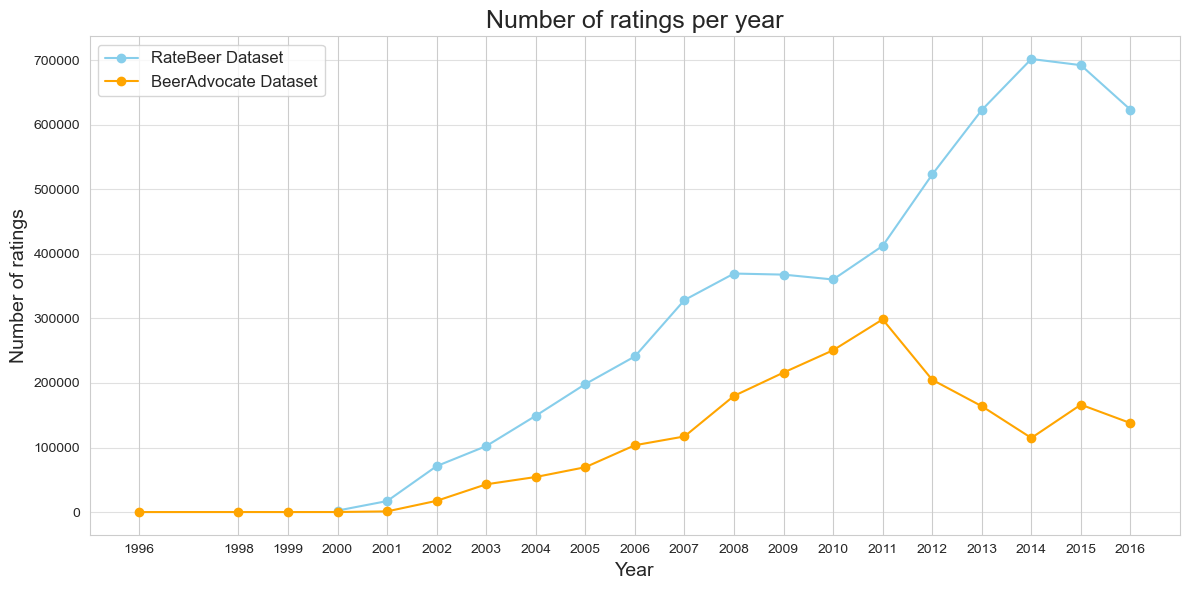

In [33]:
# Group by year and count the number of ratings for each dataset
ratings_rateBeer = time_df_rateBeer.groupby('year')['rating'].count().reset_index()
ratings_beerAdvocate = time_df_beerAdvocate.groupby('year')['rating'].count().reset_index()
# Discard year 2017 as the year is not complete
ratings_rateBeer = ratings_rateBeer[ratings_rateBeer['year'] != 2017].reset_index()
ratings_beerAdvocate = ratings_beerAdvocate[ratings_beerAdvocate['year'] != 2017].reset_index()

# Plot the data
plt.figure(figsize=(12, 6))

# Reviews dataset
plt.plot(ratings_rateBeer['year'], ratings_rateBeer['rating'], label='RateBeer Dataset', marker='o', color='skyblue')
# BeerAdvocate dataset
plt.plot(ratings_beerAdvocate['year'], ratings_beerAdvocate['rating'], label='BeerAdvocate Dataset', marker='o', color='orange')

plt.title('Number of ratings per year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of ratings', fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', alpha=0.6)
plt.xticks(ratings_beerAdvocate['year'])
plt.tight_layout()

# Show plot
plt.show()

The first year are not determinant as the number of review was very low, we will only focus on the data from 2001 for RateBeer and 2002 for BeerAdvocate. In these 5 plot we can see the that for both datasets the average ratings goes up through the year ...

To deepen ours analysis on the time bias, we will compare the ratings during the christmas and new year period and the oktober fest period with the rest of the year to see if there is a difference.

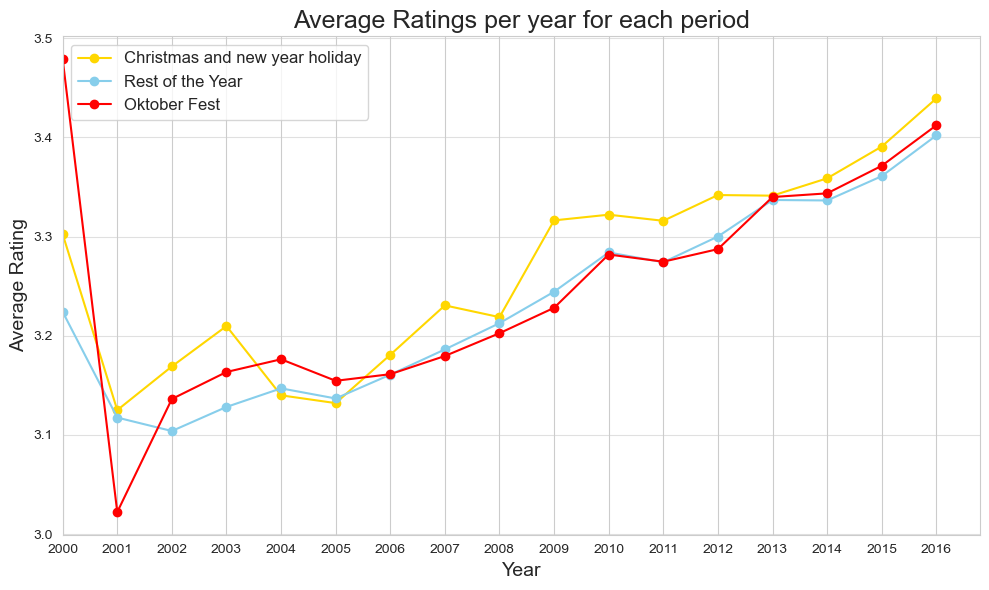

In [12]:
def get_periode(db_time_mod):
    # Create two variables that represent the time of Christmas and Oktober fest period
    xmas_hol = db_time_mod[(db_time_mod['month'] == 12) & (db_time_mod['day'] >= 23) | (db_time_mod['month'] == 1) & (db_time_mod['day'] <= 2)]
    oktober_fest = db_time_mod[(db_time_mod['month'] == 9) & (db_time_mod['day'] >= 16) | (db_time_mod['month'] == 10) & (db_time_mod['day'] <= 3)]

    # Create a variable that represents the rest of the year
    rest_year = db_time_mod[~(((db_time_mod['month'] == 12) & (db_time_mod['day'] >= 23) | (db_time_mod['month'] == 1) & (db_time_mod['day'] <= 2)) & (db_time_mod['month'] == 9) & (db_time_mod['day'] >= 16) | (db_time_mod['month'] == 10) & (db_time_mod['day'] <= 3))]

    return xmas_hol, oktober_fest, rest_year

def time_period_rating(db_time):
    # For this part we want the 2 first days of january to be considered as part of the previous year
    condition = (db_time['month'] == 1) & (db_time['day'] <= 2)
    db_time_mod = db_time.copy()
    db_time_mod.loc[condition, 'year'] -= 1

    xmas_hol, oktober_fest, rest_year = get_periode(db_time_mod)

    # Group by year and compute the average rating for each period per year
    xmas_hol_mean = xmas_hol.groupby(db_time_mod['year'])['rating'].mean()
    oktober_fest_mean = oktober_fest.groupby(db_time_mod['year'])['rating'].mean()
    rest_year_mean = rest_year.groupby(db_time_mod['year'])['rating'].mean()

    # Delete entry for year 2017 as it is not present for all period
    rest_year_mean = rest_year_mean[rest_year_mean.index.isin(oktober_fest_mean.index)]
    xmas_hol_mean = xmas_hol_mean[xmas_hol_mean.index.isin(oktober_fest_mean.index)]

    # Plot the data
    plt.figure(figsize=(12, 6))

    plt.plot(xmas_hol_mean.index, xmas_hol_mean.values, label='Christmas and new year holiday', color='gold', marker='o')
    plt.plot(rest_year_mean.index, rest_year_mean.values, label='Rest of the Year', color='skyblue', marker='o')
    plt.plot(oktober_fest_mean.index, oktober_fest_mean.values, label='Oktober Fest', color='red', marker='o')

    plt.title('Average Ratings per year for each period', fontsize=18)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Average Rating', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(axis='y', alpha=0.6)
    plt.xticks(rest_year_mean.index)
    plt.xlim(2000)
    plt.tight_layout()

time_period_rating(time_df_rateBeer)

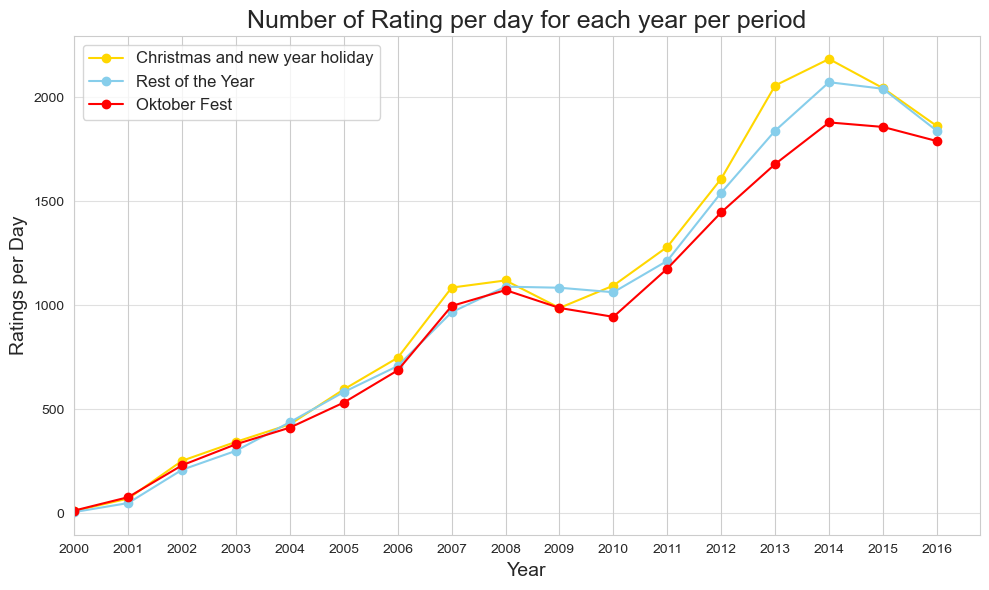

In [13]:
def time_period_per_day(db_time):
    # Number of day per period
    xmas_hol_days = 11
    oktober_fest_days = 18
    rest_year_Days = 365 - xmas_hol_days - oktober_fest_days

    # For this part we want the 2 first days of january to be considered as part of the previous year
    condition = (db_time['month'] == 1) & (db_time['day'] <= 2)
    db_time_mod = db_time.copy()
    db_time_mod.loc[condition, 'year'] -= 1

    xmas_hol, oktober_fest, rest_year = get_periode(db_time_mod)

    # Count the number of ratings per day for each period per year
    xmas_hol_rating = xmas_hol.groupby(db_time['year'])['rating'].count() / xmas_hol_days
    oktober_fest_rating = oktober_fest.groupby(db_time['year'])['rating'].count() / oktober_fest_days
    rest_year_rating = rest_year.groupby(db_time['year'])['rating'].count() / rest_year_Days

    # Delete entry for year 2017 as it is not present for all period
    rest_year_rating  = rest_year_rating[rest_year_rating.index.isin(oktober_fest_rating.index)]
    xmas_hol_rating = xmas_hol_rating[xmas_hol_rating.index.isin(oktober_fest_rating.index)]

    # Plot the data
    plt.figure(figsize=(12, 6))

    plt.plot(xmas_hol_rating.index, xmas_hol_rating.values, label='Christmas and new year holiday', color='gold', marker='o')
    plt.plot(rest_year_rating.index, rest_year_rating.values, label='Rest of the Year', color='skyblue', marker='o')
    plt.plot(oktober_fest_rating.index, oktober_fest_rating.values, label='Oktober Fest', color='red', marker='o')

    plt.title('Number of Rating per day for each year per period', fontsize=18)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Ratings per Day', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(axis='y', alpha=0.6)
    plt.xticks(rest_year_rating.index)
    plt.xlim(2000)
    plt.tight_layout()

time_period_per_day(time_df_rateBeer)

(3.6, 4.2)

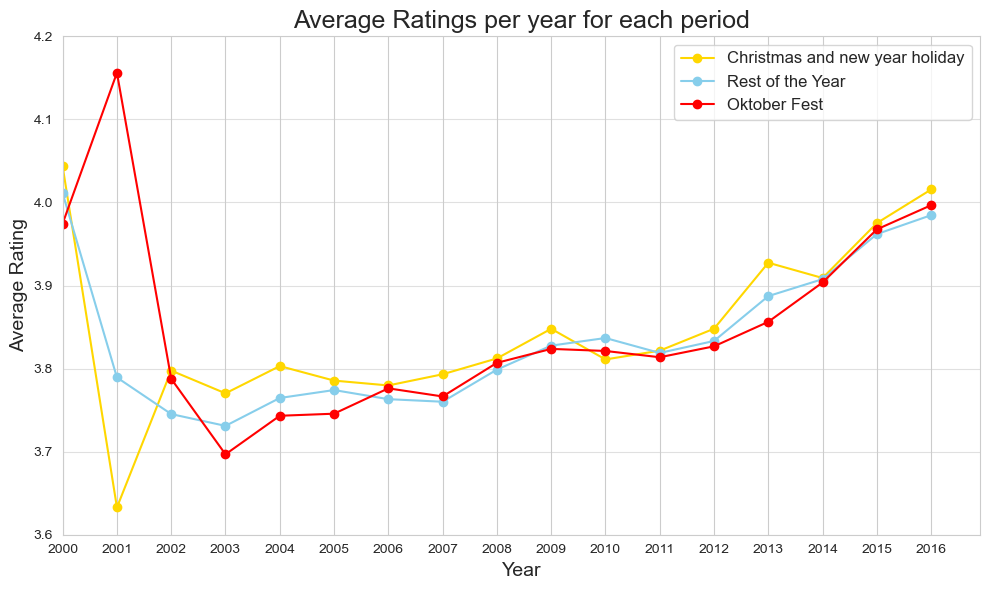

In [14]:
time_period_rating(time_df_beerAdvocate)
plt.ylim(3.6, 4.2)

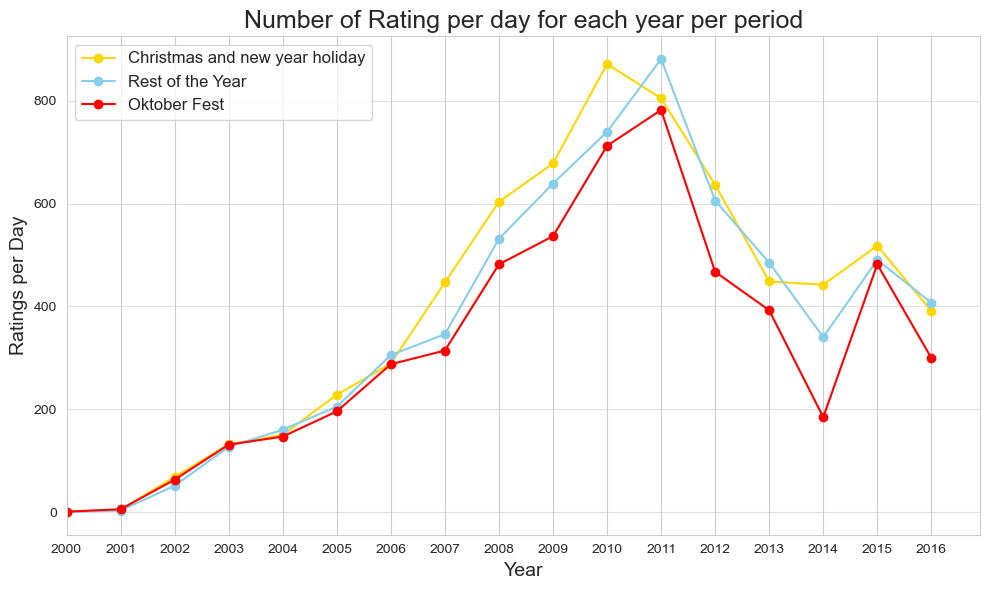

In [15]:
time_period_per_day(time_df_beerAdvocate)